In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import altair as alt

%config InlineBackend.figure_format = 'retina'
sns.set()
rand = np.random.RandomState(95)

In [332]:
n = 100
p = 1000

μ = 0
σ = 2

x = rand.normal(μ, σ, size=(n, p))

In [418]:
df = pd.DataFrame(x)
sam = 3
base = alt.Chart(df.sample(sam, axis=1).melt(var_name='sample', value_name='measurement'))

kde = base.mark_area(opacity=0.5, interpolate='step').encode(
    alt.X('measurement:Q', bin=alt.Bin(maxbins=n//2)),
    alt.Y('count()', stack=None),
    alt.Color('sample:N')
).properties(height=100)

points = base.mark_tick(opacity=1).encode(
    x=alt.X('measurement:Q', title=''),
    y=alt.Y('sample:N', title=''),
    color=alt.Color('sample:N')
)

rule = base.mark_circle(color='black').encode(
    x='mean(measurement):Q',
    y='sample:N'
)

kde & (points+rule)

alt.VConcatChart(...)

-0.005566337168578496 0.20022457617826617


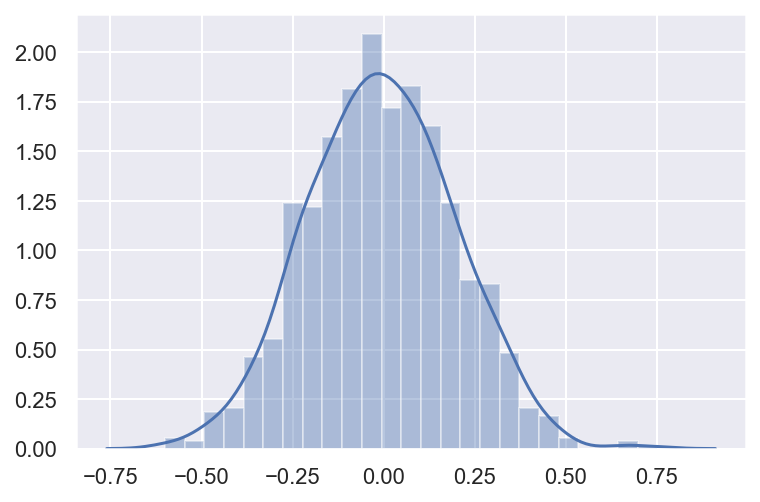

In [402]:
x̄ = np.mean(x, axis=0)
s = np.std(x, axis=0)

print(x̄.mean(), x̄.std())

sns.distplot(x̄)

In [410]:
from scipy import stats

α = 0.95

threshold = stats.t.ppf(α + (1-α)/2, n-1)

In [442]:
df = pd.DataFrame(x).melt(var_name='sample')
#forbox = pd.DataFrame({'mean': df.groupby('sample').mean(), 'sd': df.groupby('sample').std()})

summary = df.groupby('sample').agg({'value': ['mean', 'std']})['value'].reset_index()
summary['sem'] = summary['std'] / np.sqrt(n)

# sem = df.groupby('sample').std()['value'] / np.sqrt(n)

# forbox['low'] = forbox['value'] - threshold * sem
# forbox['high'] = forbox['value'] + threshold * sem
# forbox['sig'] = (forbox['high'] < μ) | (forbox['low'] > μ)

In [516]:
from altair import datum

base = alt.Chart().transform_calculate(
    low=datum.mean - threshold * datum.sem,
    high=datum.mean + threshold * datum.sem,
    sig=alt.expr.if_((alt.datum.high < μ) | (alt.datum.low > μ), True, False)
)

# slider = alt.binding_range(min=0, max=1, step=10)
# select_year = alt.selection_single(name="year", fields=['year'],
#                                    bind=slider, init={'year': 2000})

points = base.mark_point(
    filled=True,
    color='sig:N'
).encode(
    x='sample:O',
    y='mean:Q',
)

errorbars = base.mark_errorbar().encode(
    x='sample:O',
    y='low:Q',
    y2='high:Q',
    color='sig:N',
    size='sig:N'
)

line = base.mark_rule(color='red').encode(
    y='line:Q'
).transform_calculate(line=str(μ))

text = base.mark_text(align='left', dx=5, dy=-100).encode(
        text=alt.Text('fuck2:N')
).transform_aggregate(fuck=f'mean(low)').transform_calculate(fuck2='datum.fuck + " units"')


alt.layer(points, errorbars, line, text, data=summary.sample(100)
         ).properties(width=1000)

alt.LayerChart(...)